In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cosmosis
import os
import numpy as np

In [2]:
dirname = os.getcwd()
if os.getcwd().endswith("cosmosis-standard-library" + os.path.sep + "examples"):
    print("Switching to directory above to run examples")
    os.chdir(os.path.pardir)

Switching to directory above to run examples


Basic usage
==========

The usual way to run CosmoSIS is by writing several parameter files.  Let's run an example analysis: an example of fitting Supernova data using the "emcee" sampling method.

(If you get a message starting "You told me to resume the chain ..." then don't worry, it just means you've already run this example so the results already exist).

In [3]:
cosmosis.run_cosmosis("examples/pantheon.ini")

Setting up pipeline from parameter file examples/pantheon.ini
-------------------------------------------------------------


INFO:root:Generating starting positions in small ball around starting point


Loading Pantheon data from /Users/jzuntz/src/cosmosis/cosmosis-standard-library/likelihood/pantheon/lcparam_DS17f.txt
Found 40 Pantheon supernovae (or bins if you used the binned data file)
Loading Pantheon covariance from /Users/jzuntz/src/cosmosis/cosmosis-standard-library/likelihood/pantheon/sys_DS17f.txt
Likelihood "riess21" will be Gaussian 0.732 +/- 0.013 

Parameter Priors
----------------
cosmological_parameters--omega_m  ~ U(0.15, 0.4)
cosmological_parameters--h0       ~ U(0.6, 0.8)
cosmological_parameters--w        ~ delta(-1.0)
cosmological_parameters--omega_b  ~ delta(0.04)
cosmological_parameters--omega_k  ~ U(-0.3, 0.3)
cosmological_parameters--a_s      ~ delta(2e-09)
cosmological_parameters--n_s      ~ delta(1.0)
cosmological_parameters--tau      ~ delta(0.08)
supernova_params--m               ~ U(-21.0, -18.0)

****************************
* Running sampler 1/1: emcee
* Running in serial mode.
* Saving output -> output/pantheon.txt
* Note: You set resume=T but the file 

0

Reading the printed output
------------------------------

The printed shows us several things:

- Information from the setup phase of the modules (see below).

- Priors on our parameters, uniform (U) and fixed (delta).

- Details about the sampler and where its output will go.

- The progress of the sampling.


Getting output directly
--------------------------

By default CosmoSIS saves output to a file, but you can get the output directly in python by setting the output parameter. The simplest choice for it is `astropy`, which will give you an astropy table of the results.

Note that in this form the chain can't resume from an existing run, so for larger or slower runs it's wiser to save to file.

In [4]:
status, output = cosmosis.run_cosmosis("examples/pantheon.ini", output="astropy")

INFO:root:Generating starting positions in small ball around starting point


Setting up pipeline from parameter file examples/pantheon.ini
-------------------------------------------------------------
Loading Pantheon data from /Users/jzuntz/src/cosmosis/cosmosis-standard-library/likelihood/pantheon/lcparam_DS17f.txt
Found 40 Pantheon supernovae (or bins if you used the binned data file)
Loading Pantheon covariance from /Users/jzuntz/src/cosmosis/cosmosis-standard-library/likelihood/pantheon/sys_DS17f.txt
Likelihood "riess21" will be Gaussian 0.732 +/- 0.013 

Parameter Priors
----------------
cosmological_parameters--omega_m  ~ U(0.15, 0.4)
cosmological_parameters--h0       ~ U(0.6, 0.8)
cosmological_parameters--w        ~ delta(-1.0)
cosmological_parameters--omega_b  ~ delta(0.04)
cosmological_parameters--omega_k  ~ U(-0.3, 0.3)
cosmological_parameters--a_s      ~ delta(2e-09)
cosmological_parameters--n_s      ~ delta(1.0)
cosmological_parameters--tau      ~ delta(0.08)
supernova_params--m               ~ U(-21.0, -18.0)

****************************
* Runnin

Our table contains the cosmological parameters that were varied during the chain. The one in capital letters is a derived parameter calculated from the others.

Now we can plot some results directly from this table:

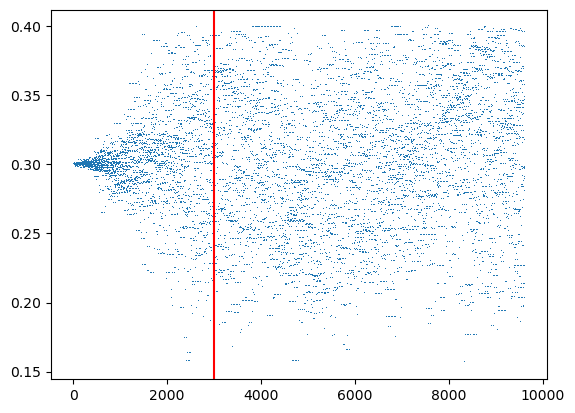

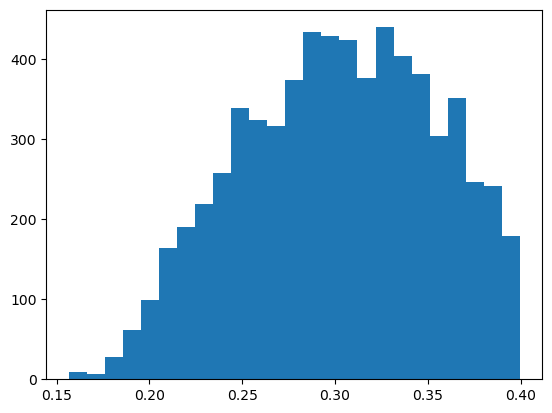

In [5]:
plt.plot(output["cosmological_parameters--omega_m"], ',')

# The plot will show the chain is not burnt in until about 3000 samples
burn = 3000
plt.axvline(burn, color='r')
chain = output[burn:]

# A histogram shows us posterior constraints
plt.figure()
plt.hist(chain['cosmological_parameters--omega_m'], bins=25);

Customizing runs
==============

We can modify the choices made in the analysis by changing the parameters or values

The parameters configure the *pipeline*, *modules*, and the *sampler*.  Here they read directly from `examples/pantheon.ini`

The values defines the numerical parameters that might be varied in the sampling process. The name of the values file is set in the parameter file, in the `values` option in the `pipeline` section.

Instead of having CosmoSIS read these from the file for us, we can also read them ourselves and modify them

In [6]:
ini = cosmosis.Inifile("examples/pantheon.ini")

# Print a summary of the contents:
print("Sections in the file:")
for section in ini.sections():
    print("    ", section)
print("\n")
print("Options in the [camb] section, for example:")
for key, value in ini.items('camb'):
    print("    ", key, "=", value)

Sections in the file:
     runtime
     emcee
     polychord
     multinest
     output
     pipeline
     maxlike
     metropolis
     test
     astropy
     camb
     pantheon
     riess21
     consistency


Options in the [camb] section, for example:
     file = boltzmann/camb/camb_interface.py
     mode = background
     feedback = 0
     nz_background = 200
     zmin_background = 0.0
     zmax_background = 2.0


Let's change to use a different sampler, called nautilus.

In [7]:
ini['runtime', 'sampler'] = 'nautilus'
ini['runtime', 'resume'] = 'False'


In [8]:
status, chain2 = cosmosis.run_cosmosis(ini, output='astropy')

Setting up pipeline from pre-constructed configuration
------------------------------------------------------
Setting up pipeline from pre-constructed configuration
Loading Pantheon data from /Users/jzuntz/src/cosmosis/cosmosis-standard-library/likelihood/pantheon/lcparam_DS17f.txt
Found 40 Pantheon supernovae (or bins if you used the binned data file)
Loading Pantheon covariance from /Users/jzuntz/src/cosmosis/cosmosis-standard-library/likelihood/pantheon/sys_DS17f.txt
Likelihood "riess21" will be Gaussian 0.732 +/- 0.013 

Parameter Priors
----------------
cosmological_parameters--omega_m  ~ U(0.15, 0.4)
cosmological_parameters--h0       ~ U(0.6, 0.8)
cosmological_parameters--w        ~ delta(-1.0)
cosmological_parameters--omega_b  ~ delta(0.04)
cosmological_parameters--omega_k  ~ U(-0.3, 0.3)
cosmological_parameters--a_s      ~ delta(2e-09)
cosmological_parameters--n_s      ~ delta(1.0)
cosmological_parameters--tau      ~ delta(0.08)
supernova_params--m               ~ U(-21.0, -18.

In [9]:
chain2.info()

<Table length=32700>
              name                dtype 
-------------------------------- -------
cosmological_parameters--omega_m float64
     cosmological_parameters--h0 float64
cosmological_parameters--omega_k float64
             supernova_params--m float64
  COSMOLOGICAL_PARAMETERS--OMMH2 float64
                      log_weight float64
                           prior float64
                            post float64


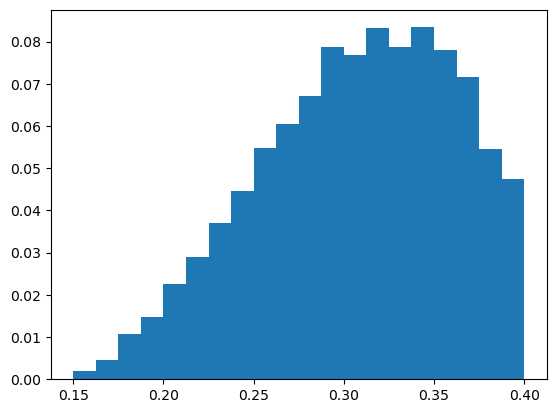

In [10]:
plt.hist(chain2['cosmological_parameters--omega_m'], weights=np.exp(chain2['log_weight']), bins=20);
